In [16]:
# SECTION 1: Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant  # Import OLS for detailed regression analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ipywidgets as widgets
from IPython.display import display
import joblib  # Import for saving the model
from sklearn.datasets import load_iris  # Import preloaded dataset

In [14]:
# SECTION 2: Data Upload and Preprocessing
def load_iris_data():
    """Loads the Iris dataset and prepares it."""
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Iris Dataset Preview:")
    display(df.head())
    return df

# Placeholder for loaded data
df = load_iris_data()

Iris Dataset Preview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# SECTION 3: Preprocessing Options
def handle_missing_values(data, method):
    """Handles missing values based on the selected method."""
    if method == 'Remove Rows':
        return data.dropna()
    elif method == 'Impute Mean':
        return data.fillna(data.mean())
    elif method == 'Impute Median':
        return data.fillna(data.median())
    else:  # No Missing Values
        return data

def handle_duplicates(data, remove):
    """Handles duplicate rows based on the selected option."""
    if remove:
        return data.drop_duplicates()
    return data

def scale_features(data, method):
    """Scales features based on the selected method."""
    if method == 'Normalize':
        return (data - data.min()) / (data.max() - data.min())
    elif method == 'Standardize':
        return (data - data.mean()) / data.std()
    return data

def check_multicollinearity(X):
    """Checks for multicollinearity using Variance Inflation Factor (VIF)."""
    if X.shape[1] == 0:
        print("No predictors available for multicollinearity check.")
        return pd.DataFrame()
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("Multicollinearity Check (VIF):")
    display(vif_data)
    return vif_data

In [18]:
# SECTION 4: Model Selection and Training
def train_simple_model(data, target_col, predictor_col, metric):
    """Trains a Simple Linear Regression model."""
    X = data[[predictor_col]]
    y = data[target_col]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metric Calculation
    if metric == 'MSE':
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")
    elif metric == 'RMSE':
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f"Root Mean Squared Error: {rmse}")
    elif metric == 'R²':
        r_squared = r2_score(y_test, y_pred)
        print(f"R² (Coefficient of Determination): {r_squared}")
    else:
        print("Unsupported metric selected.")
    
    # Visualization
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Simple Linear Regression Predictions vs True Values")
    plt.show()

    return model

def train_multi_model(data, target_col, predictor_cols, metric):
    """Trains a Multiple Linear Regression model using statsmodels OLS after checking multicollinearity."""
    X = data[predictor_cols]
    y = data[target_col]

    # Multicollinearity Check
    vif_result = check_multicollinearity(X)
    if vif_result.empty:
        print("Skipping model training due to issues with predictors.")
        return None

    # Add constant for OLS
    X = add_constant(X)

    # Train the model using OLS
    model = OLS(y, X).fit()
    print(model.summary())

    # Predictions
    y_pred = model.predict(X)

    # Metric Calculation (Train Set Metrics since OLS does not split data)
    if metric == 'MSE':
        mse = mean_squared_error(y, y_pred)
        print(f"Mean Squared Error: {mse}")
    elif metric == 'RMSE':
        rmse = mean_squared_error(y, y_pred, squared=False)
        print(f"Root Mean Squared Error: {rmse}")
    elif metric == 'R²':
        r_squared = r2_score(y, y_pred)
        print(f"R² (Coefficient of Determination): {r_squared}")
    else:
        print("Unsupported metric selected.")

    # Visualization
    plt.scatter(y, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Multiple Linear Regression Predictions vs True Values")
    plt.show()

    return model

Dropdown(description='Missing Values:', options=('No Missing Values', 'Remove Rows', 'Impute Mean', 'Impute Me…

ToggleButtons(description='Remove Duplicates:', options=('No', 'Yes'), value='No')

Dropdown(description='Target:', options=('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal …

SelectMultiple(description='Predictors:', index=(0, 1, 2), options=('sepal length (cm)', 'sepal width (cm)', '…

Dropdown(description='Single Predictor:', options=('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)…

Dropdown(description='Scaling:', options=('Don’t Scale', 'Normalize', 'Standardize'), value='Don’t Scale')

Dropdown(description='Metric:', options=('MSE', 'RMSE', 'R²'), value='MSE')

Dropdown(description='Model Type:', options=('Simple Linear Regression', 'Multiple Linear Regression'), value=…

Button(description='Run Model', style=ButtonStyle())

Button(description='Clear Model', style=ButtonStyle())

Multicollinearity Check (VIF):


,Feature,VIF
0,sepal length (cm),22.993699
1,sepal width (cm),22.993699


Multicollinearity Check (VIF):


,Feature,VIF
0,sepal length (cm),22.993699
1,sepal width (cm),22.993699


                            OLS Regression Results                            
Dep. Variable:      petal length (cm)   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     482.0
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.74e-65
Time:                        09:19:09   Log-Likelihood:                -145.89
No. Observations:                 150   AIC:                             297.8
Df Residuals:                     147   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5248      0.56

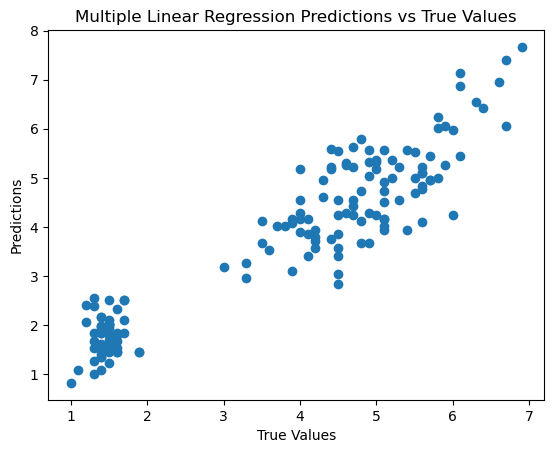

Model cleared. You can now train a new model.
R² (Coefficient of Determination): 0.9285735546218209


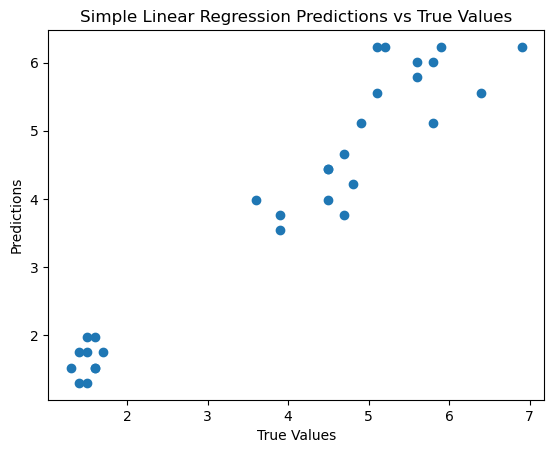

In [19]:
# SECTION 5: Interactive Widgets
def interactive_ui():
    """Creates an interactive UI for testing the app logic."""

    missing_selector = widgets.Dropdown(
        options=['No Missing Values', 'Remove Rows', 'Impute Mean', 'Impute Median'],
        value='No Missing Values',
        description='Missing Values:'
    )

    duplicates_selector = widgets.ToggleButtons(
        options=['No', 'Yes'],
        description='Remove Duplicates:',
        disabled=False
    )

    target_selector = widgets.Dropdown(
        options=df.select_dtypes(include=[np.number]).columns.tolist(),
        value=df.select_dtypes(include=[np.number]).columns.tolist()[0],  # Default to the first numerical column
        description='Target:'
    )
    
    predictor_selector = widgets.SelectMultiple(
        options=df.columns.tolist(),
        value=df.columns[:-1].tolist()[:3],  # Default to first three columns as predictors
        description='Predictors:'
    )

    single_predictor_selector = widgets.Dropdown(
        options=df.columns.tolist(),
        value=df.columns[0],
        description='Single Predictor:'
    )

    scaling_selector = widgets.Dropdown(
        options=['Don’t Scale', 'Normalize', 'Standardize'],
        value='Don’t Scale',
        description='Scaling:'
    )
    
    metric_selector = widgets.Dropdown(
        options=['MSE', 'RMSE', 'R²'],
        value='MSE',
        description='Metric:'
    )

    model_selector = widgets.Dropdown(
        options=['Simple Linear Regression', 'Multiple Linear Regression'],
        value='Simple Linear Regression',
        description='Model Type:'
    )

    run_button = widgets.Button(description="Run Model")
    clear_button = widgets.Button(description="Clear Model")

    display(missing_selector, duplicates_selector, target_selector, predictor_selector, single_predictor_selector, scaling_selector, metric_selector, model_selector, run_button, clear_button)

    def on_run_button_click(b):
        if df is not None and target_selector.value:
            data = df.copy()

            # Handle missing values
            data = handle_missing_values(data, missing_selector.value)

            # Handle duplicates
            data = handle_duplicates(data, duplicates_selector.value == 'Yes')

            if model_selector.value == 'Simple Linear Regression':
                # Simple Linear Regression
                if not single_predictor_selector.value:
                    print("Please select a single predictor for Simple Linear Regression.")
                    return

                predictor = single_predictor_selector.value
                data[predictor] = scale_features(data[[predictor]], scaling_selector.value)
                model = train_simple_model(data, target_col=target_selector.value, predictor_col=predictor, metric=metric_selector.value)

            elif model_selector.value == 'Multiple Linear Regression':
                # Multiple Linear Regression
                predictors = list(predictor_selector.value)
                if len(predictors) == 0:
                    print("Please select at least one predictor for Multiple Linear Regression.")
                    return

                data[predictors] = scale_features(data[predictors], scaling_selector.value)

                # Multicollinearity Check
                vif_result = check_multicollinearity(data[predictors])
                if vif_result.empty:
                    print("Skipping model training due to issues with predictors.")
                    return

                model = train_multi_model(data, target_col=target_selector.value, predictor_cols=predictors, metric=metric_selector.value)

    def on_clear_button_click(b):
        print("Model cleared. You can now train a new model.")

    run_button.on_click(on_run_button_click)
    clear_button.on_click(on_clear_button_click)

# Run interactive UI
interactive_ui()